# Webscraping

In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import pandas as pd
import requests
from urllib.request import urlopen
import collections
from urllib.parse import urljoin
import seaborn as sns
import matplotlib.pyplot as plt

### Functions created to scrape indeed for data science skills

In [2]:
def count_in(x):
    if len(x) == 0:
        return(0)
    else:
        return(1)

In [3]:
def getlink(url,x):
    lang = ["C","C++","Java","Javascript","Python","R","SQL","Hadoop","Hive","Pig","Spark","AWS","Tableau",
            'SAS', 'Excel']
    df2 = pd.DataFrame([], columns = lang)
    for i in range(x): 
        page = urlopen(url)
        soup = BeautifulSoup(page, 'lxml')
        all_matches = soup.findAll(attrs={'rel':['nofollow']})
        for c in all_matches:
            sum_py = 0
            sum_C = 0
            sum_Cplus = 0
            sum_java = 0
            sum_javascript = 0
            sum_r = 0
            sum_sql = 0
            sum_hadoop = 0
            sum_hive = 0
            sum_pig = 0
            sum_spark = 0
            sum_aws = 0 
            sum_tableau = 0
            sum_sas= 0 
            sum_ex = 0 
            jd_url = 'http://www.indeed.com/m/'+c['href']
            response = requests.get(jd_url)
            jd_page = response.text
            jd_soup = BeautifulSoup(jd_page, 'lxml')
            jd_desc = jd_soup.findAll('div',attrs={'id':['desc']}) ## find the structure like: <div id="desc"></>

            C = re.findall(r'[\b\s\/]C\b[\/\s,]', str(jd_desc))
            C2 = count_in(C)
            sum_C = sum_C + C2

            c_plus = re.findall(r'[\b\/\s]?C\+\+[\s,]?', str(jd_desc))
            c_plus2 = count_in(c_plus)
            sum_Cplus = sum_Cplus + c_plus2

            java = re.findall(r'[\/\b\s]?Java[\b,\/]?', str(jd_desc))
            java2 = count_in(java)
            sum_java = sum_java + java2

            javascript = re.findall(r'[\/\s\b]Java[Ss]cript[\/\b\s,]?', str(jd_desc))
            javascript2 = count_in(javascript)
            sum_javascript = sum_javascript + javascript2

            python = re.findall(r'[\/\b]?[Pp]ython[\s\/,]?', str(jd_desc))
            python2 = count_in(python)
            sum_py = sum_py + python2

            R = re.findall(r'[\s\/\b]?R[\b\s\/,]', str(jd_desc))
            R2 = count_in(R)
            sum_r = sum_r + R2

            sql = re.findall(r'[\/\b]?SQL[\s\/,]?', str(jd_desc))
            sql2 = count_in(sql)
            sum_sql = sum_sql + sql2

            hadoop = re.findall(r'[\/\b]?Hadoop[\s\/,]?', str(jd_desc))
            hadoop2 = count_in(hadoop)
            sum_hadoop = sum_hadoop + hadoop2

            hive = re.findall(r'[\/\b]?Hive[\s\/,]?', str(jd_desc))
            hive2 = count_in(hive)
            sum_hive = sum_hive + hive2

            pig = re.findall(r'[\/\b]?Pig[\s\/,]?', str(jd_desc))
            pig2 = count_in(pig)
            sum_pig = sum_pig + pig2

            spark = re.findall(r'[\/\b]?Spark[\s\/,]?', str(jd_desc))
            spark2 = count_in(spark)
            sum_spark = sum_spark + spark2

            aws = re.findall(r'[\/\b]?AWS[\s\/,]?', str(jd_desc))
            aws2 = count_in(aws)
            sum_aws = sum_aws + aws2

            tableau = re.findall(r'[\/\b\/]?Tableau[\s\/,]?', str(jd_desc))
            tab2 = count_in(tableau)
            sum_tableau = sum_tableau + tab2
            
            sas = re.findall(r'[\/\b\/]?SAS[\s\/,]?', str(jd_desc))
            sas2 = count_in(sas)
            sum_sas = sum_sas + sas2
            
            excel = re.findall(r'[\/\b\/]?[Ee]xcel[\s\/,]?', str(jd_desc))
            ex2 = count_in(excel)
            sum_ex = sum_ex + ex2

            df = pd.DataFrame([[sum_C,sum_Cplus,sum_java,sum_javascript,sum_py,sum_r,sum_sql,
                        sum_hadoop,sum_hive,sum_pig,sum_spark,sum_aws,sum_tableau,sum_sas, sum_ex]], columns = lang)
            df2 = pd.concat([df,df2], axis =0)
            

        url_all = soup.findAll(attrs={'rel':['next']})
        print(url_all)

        url = 'http://www.indeed.com/m/'+ str(url_all[0]['href'])
    df2.reset_index(inplace = True)
    df2.drop('index', inplace = True, axis = 1)
    df3 = df2.sum(axis = 0)
    df4 = pd.DataFrame(df3, columns = ['Count'])
    df4.reset_index(inplace = True)
    df4.rename({'index': 'language'}, inplace = True, axis = 1)
    t_job = len(df2)
    print('Total Jobs:', len(df2))
    return(df2, df4, t_job)

### Nationwide

In [4]:
nw, nw_count, nw_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=",10)

[<link href="jobs?q=data+science&amp;l=&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=&amp;start=100" rel="next"/>]
Total Jobs: 129


In [5]:
nw.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
126,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
127,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
128,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1


In [48]:
def plot_count(x,total, title):
    sns.set()
    print('Number of Jobs:', total)
    print(x)
    plt.figure(figsize = (12,8))
    sns.barplot(x='language', y='Count', data=x).set_title(title,fontsize=20)
    plt.xlabel('Skill',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    ax = plt.gca()
    for nr, p in enumerate(ax.patches):
        height = round(p.get_height(),0)
        ax.text(nr, height + 1.5,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')

Number of Jobs: 129
      language  Count
0            C    3.0
1          C++    3.0
2         Java   23.0
3   Javascript    4.0
4       Python   79.0
5            R   52.0
6          SQL   55.0
7       Hadoop   20.0
8         Hive   14.0
9          Pig    4.0
10       Spark   26.0
11         AWS    9.0
12     Tableau   19.0
13         SAS   13.0
14       Excel   59.0


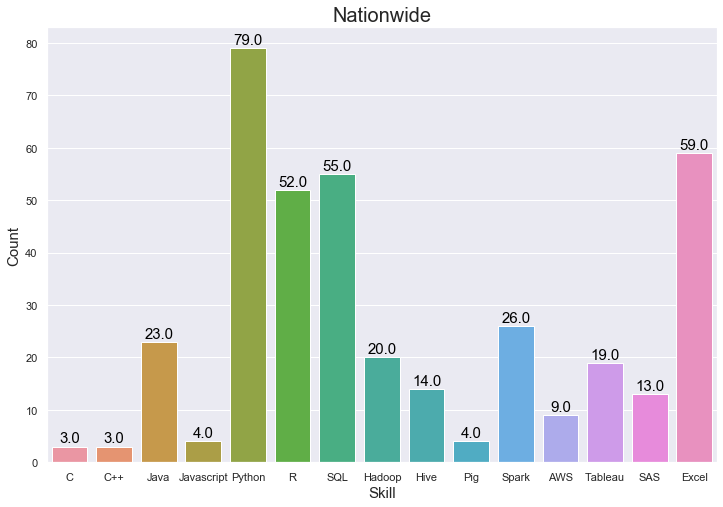

In [23]:
plot_count(nw_count, nw_total, 'Nationwide')

### Washington DC

In [24]:
dc, dc_count, dc_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Washington%2C+DC",10)

[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=19" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=29" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Washington%2C+DC&amp;start=100" rel="next"/>]
Total Jobs: 128


In [25]:
dc.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
123,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125,0,0,1,0,1,1,0,0,0,0,0,1,0,1,1
126,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1
127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 128
      language  Count
0            C    6.0
1          C++    6.0
2         Java   26.0
3   Javascript    4.0
4       Python   81.0
5            R   68.0
6          SQL   62.0
7       Hadoop    6.0
8         Hive    6.0
9          Pig    5.0
10       Spark   16.0
11         AWS   31.0
12     Tableau   29.0
13         SAS   19.0
14       Excel   58.0


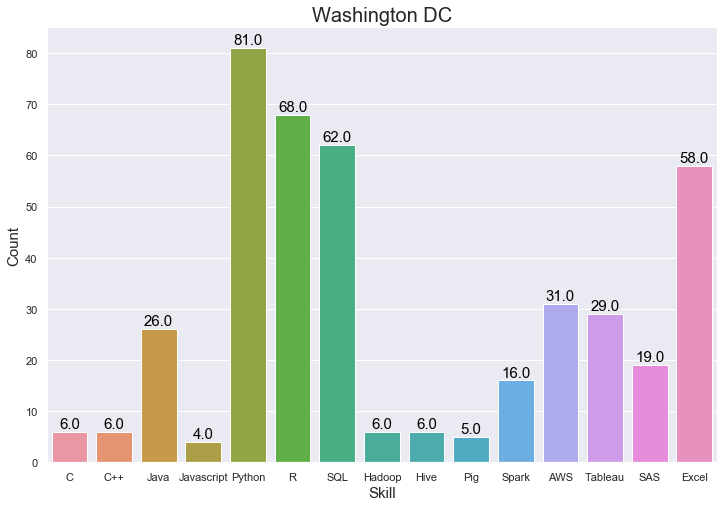

In [26]:
plot_count(dc_count, dc_total, 'Washington DC')

### New York City

In [27]:
ny, ny_count, ny_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=New+York",10)

[<link href="jobs?q=data+science&amp;l=New+York&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=New+York&amp;start=100" rel="next"/>]
Total Jobs: 130


In [15]:
ny.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
123,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0
124,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
126,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 130
      language  Count
0            C    2.0
1          C++    3.0
2         Java   22.0
3   Javascript    6.0
4       Python   85.0
5            R   66.0
6          SQL   86.0
7       Hadoop   28.0
8         Hive   16.0
9          Pig    0.0
10       Spark   30.0
11         AWS   13.0
12     Tableau   17.0
13         SAS   16.0
14       Excel   53.0


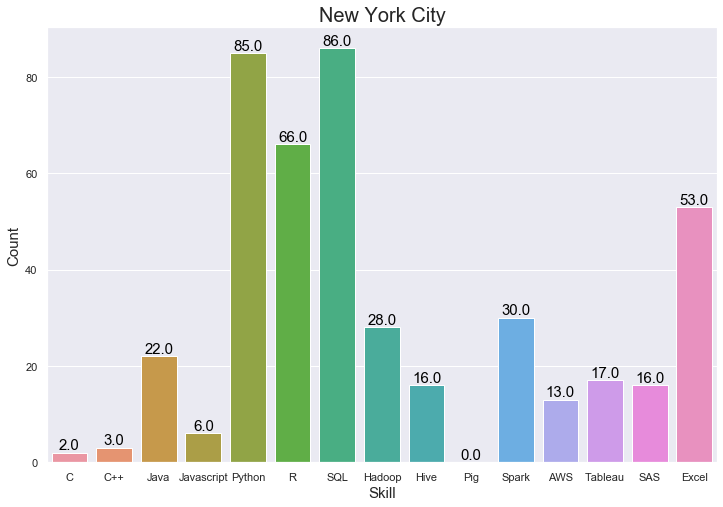

In [28]:
plot_count(ny_count, ny_total, 'New York City')

### San Francisco

In [29]:
sf, sf_count, sf_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=San+Francisco",10)

[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=San+Francisco&amp;start=100" rel="next"/>]
Total Jobs: 124


In [30]:
sf.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
119,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
120,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
122,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
123,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Number of Jobs: 124
      language  Count
0            C    2.0
1          C++    5.0
2         Java   16.0
3   Javascript    0.0
4       Python   75.0
5            R   46.0
6          SQL   59.0
7       Hadoop   20.0
8         Hive   20.0
9          Pig    7.0
10       Spark   25.0
11         AWS    8.0
12     Tableau    9.0
13         SAS    5.0
14       Excel   59.0


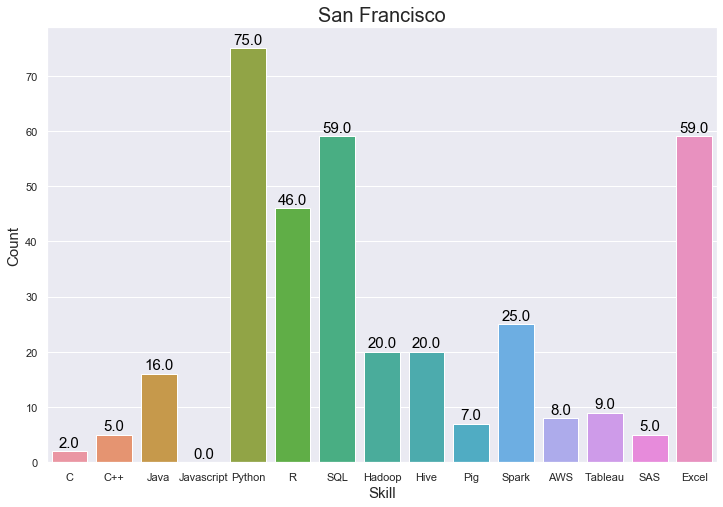

In [31]:
plot_count(sf_count, sf_total, 'San Francisco')

### Chicago

In [32]:
chi,  chi_count, chi_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Chicago",10)

[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Chicago&amp;start=100" rel="next"/>]
Total Jobs: 145


In [33]:
chi.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
141,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1
142,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
143,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Number of Jobs: 145
      language  Count
0            C    5.0
1          C++   10.0
2         Java   30.0
3   Javascript    4.0
4       Python   94.0
5            R   61.0
6          SQL   71.0
7       Hadoop   40.0
8         Hive   11.0
9          Pig    5.0
10       Spark   40.0
11         AWS   22.0
12     Tableau   26.0
13         SAS   17.0
14       Excel   57.0


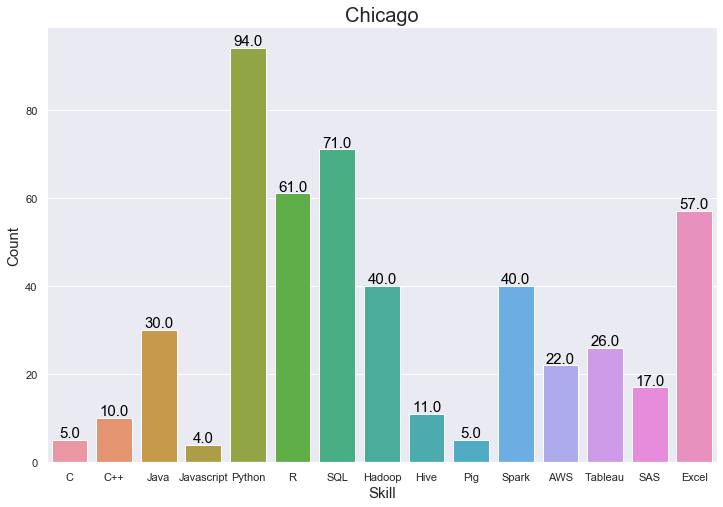

In [34]:
plot_count(chi_count, chi_total, 'Chicago')

### Austin

In [35]:
au,  au_count, au_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Austin",10)

[<link href="jobs?q=data+science&amp;l=Austin&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Austin&amp;start=100" rel="next"/>]
Total Jobs: 130


In [36]:
au.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
125,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
126,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
127,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1
128,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
129,0,0,1,1,1,0,1,1,1,0,1,0,0,0,1


Number of Jobs: 130
      language  Count
0            C    3.0
1          C++   10.0
2         Java   47.0
3   Javascript    8.0
4       Python  101.0
5            R   50.0
6          SQL   91.0
7       Hadoop   27.0
8         Hive   27.0
9          Pig    2.0
10       Spark   55.0
11         AWS   33.0
12     Tableau   25.0
13         SAS    8.0
14       Excel   56.0


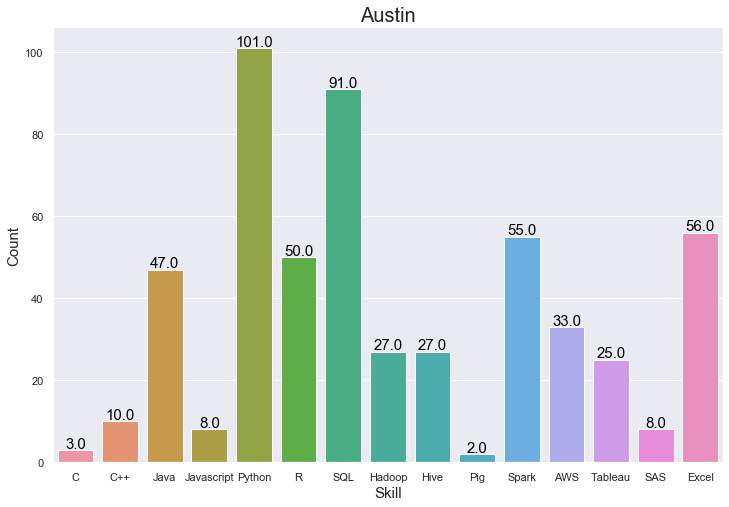

In [37]:
plot_count(au_count, au_total, 'Austin')

### Denver

In [38]:
den,  den_count, den_total = getlink("https://www.indeed.com/m/jobs?q=data+science&l=Denver",10)

[<link href="jobs?q=data+science&amp;l=Denver&amp;start=10" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=20" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=30" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=40" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=50" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=60" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=70" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=80" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=90" rel="next"/>]
[<link href="jobs?q=data+science&amp;l=Denver&amp;start=100" rel="next"/>]
Total Jobs: 113


In [40]:
den.tail()

,C,C++,Java,Javascript,Python,R,SQL,Hadoop,Hive,Pig,Spark,AWS,Tableau,SAS,Excel
108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
109,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
110,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
111,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
112,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Number of Jobs: 113
      language  Count
0            C    5.0
1          C++    5.0
2         Java   14.0
3   Javascript    3.0
4       Python   69.0
5            R   50.0
6          SQL   70.0
7       Hadoop   12.0
8         Hive    6.0
9          Pig    0.0
10       Spark   20.0
11         AWS   21.0
12     Tableau   17.0
13         SAS    9.0
14       Excel   57.0


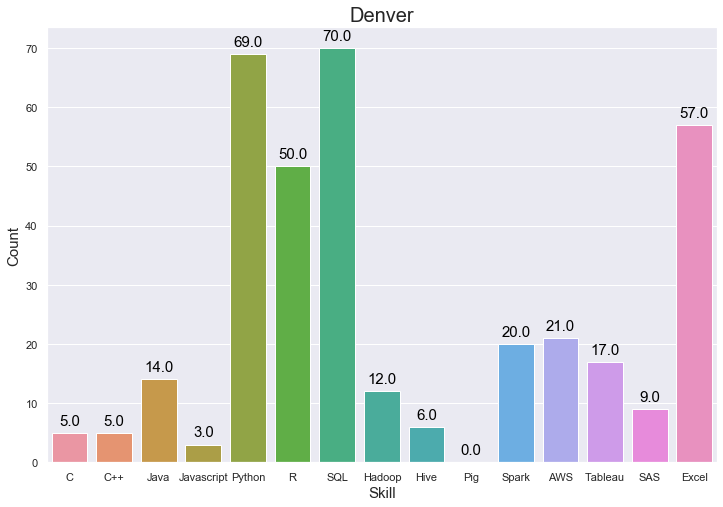

In [50]:
plot_count(den_count, den_total, 'Denver')

### All Cities

In [57]:
df_all = pd.concat([dc,den,ny,sf, au, chi], axis = 0)
df44 = df_all.sum(axis = 0)
df45 = pd.DataFrame(df44, columns = ['Count'])
df45.reset_index(inplace = True)
df45.rename({'index': 'language'}, inplace = True, axis = 1)

Number of Jobs: 770
      language  Count
0            C   23.0
1          C++   39.0
2         Java  155.0
3   Javascript   25.0
4       Python  505.0
5            R  341.0
6          SQL  439.0
7       Hadoop  133.0
8         Hive   86.0
9          Pig   19.0
10       Spark  186.0
11         AWS  128.0
12     Tableau  123.0
13         SAS   74.0
14       Excel  340.0


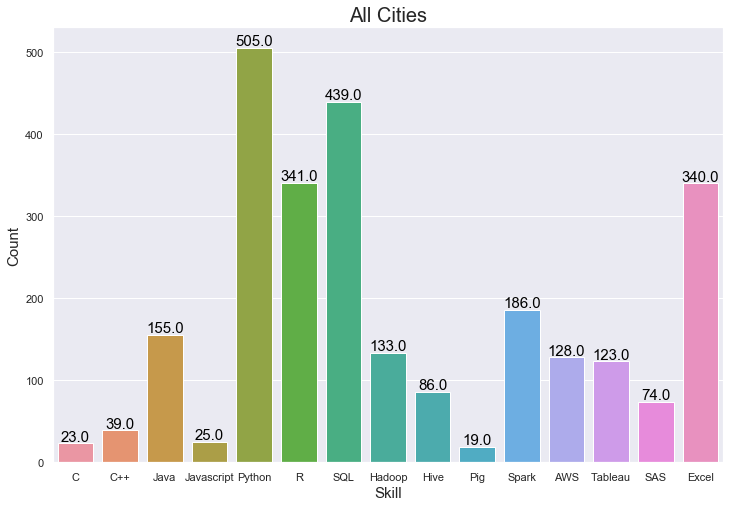

In [58]:
sns.set()
print('Number of Jobs:', len(df_all))
print(df45)
plt.figure(figsize = (12,8))
sns.barplot(x='language', y='Count', data=df45).set_title('All Cities',fontsize=20)
plt.xlabel('Skill',fontsize=15)
plt.ylabel('Count',fontsize=15)
ax = plt.gca()
for nr, p in enumerate(ax.patches):
    height = round(p.get_height(),0)
    ax.text(nr, height + 8,'{}'.format(height), color='black',fontsize=15,  ha='center', va='center')